In [142]:
#Imports
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import multiprocessing as mp
import joblib as jbl
import seaborn as sns
import math as mt
import statistics as sts
import scipy.stats as scpsts

#Estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

#Multiprocessing
from joblib import Parallel
from multiprocessing import Pool
from multiprocessing import Process

#Feature Selection
from sklearn.feature_selection import RFE

#Covariance
from sklearn.covariance import empirical_covariance
from sklearn.covariance import LedoitWolf

#Model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

#Train/test split
from sklearn.model_selection import train_test_split

In [17]:
rawData = pd.read_csv('Binned Credit Data-rev upload2.csv', header=0)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,RISK_OF_DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [18]:
empirical_covariance(rawData)

array([[ 7.49999999e+07,  2.94156604e+07,  7.83537667e+01,
         2.42804100e+02, -1.31448133e+02,  1.49100732e+03,
        -2.97562717e+02, -1.16273083e+02, -1.91685767e+02,
        -2.76904000e+01, -2.17852767e+02, -2.01870650e+02,
         1.23640532e+07,  1.10835497e+07,  1.46263922e+07,
         2.24805149e+07,  8.79550980e+06,  8.62821874e+06,
         1.39745438e+06,  1.67732754e+06,  5.96960387e+06,
         1.05729907e+06,  8.62921410e+04,  4.61830652e+05,
        -5.01500333e+01],
       [ 2.94156604e+07,  1.68338945e+10,  1.57099826e+03,
        -2.23214835e+04, -7.32342554e+03,  1.73070953e+05,
        -3.95446118e+04, -4.60361138e+04, -4.44307722e+04,
        -4.05704595e+04, -3.66693400e+04, -3.50919137e+04,
         2.72692907e+09,  2.57004452e+09,  2.54844821e+09,
         2.45384396e+09,  2.33140336e+09,  2.24376242e+09,
         4.19557151e+08,  5.33332631e+08,  4.80101961e+08,
         4.13106425e+08,  4.30551337e+08,  5.06498414e+08,
        -8.26727617e+03],
    

In [19]:
cov = LedoitWolf().fit(rawData)
cov.covariance_

array([[ 7.59260758e+07,  2.94000483e+07,  7.83121813e+01,
         2.42675235e+02, -1.31378369e+02,  1.49021598e+03,
        -2.97404789e+02, -1.16211373e+02, -1.91584032e+02,
        -2.76757036e+01, -2.17737144e+02, -2.01763509e+02,
         1.23574912e+07,  1.10776672e+07,  1.46186295e+07,
         2.24685836e+07,  8.79084169e+06,  8.62363941e+06,
         1.39671270e+06,  1.67643732e+06,  5.96643558e+06,
         1.05673792e+06,  8.62463424e+04,  4.61585541e+05,
        -5.01234168e+01],
       [ 2.94000483e+07,  1.68259260e+10,  1.57016447e+03,
        -2.23096366e+04, -7.31953871e+03,  1.72979098e+05,
        -3.95236240e+04, -4.60116806e+04, -4.44071911e+04,
        -4.05489272e+04, -3.66498781e+04, -3.50732890e+04,
         2.72548178e+09,  2.56868050e+09,  2.54709565e+09,
         2.45254162e+09,  2.33016599e+09,  2.24257157e+09,
         4.19334476e+08,  5.33049571e+08,  4.79847153e+08,
         4.12887174e+08,  4.30322827e+08,  5.06229596e+08,
        -8.26288841e+03],
    

In [20]:
#Feature space
X = rawData.iloc[:,0:24]

In [21]:
X.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.842267,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,8660.398374,129747.661567,0.489129,0.744494,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,1.000000,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [22]:
#Establishing the dependent variable
y = rawData.iloc[:,24]

In [23]:
y.describe

<bound method NDFrame.describe of 0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: RISK_OF_DEFAULT, Length: 30000, dtype: int64>

In [24]:
#Creating the training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.70, test_size = 0.30, random_state = 15)

In [25]:
X_train.shape, X_test.shape

((21000, 24), (9000, 24))

In [26]:
y_train.shape, y_test.shape

((21000,), (9000,))

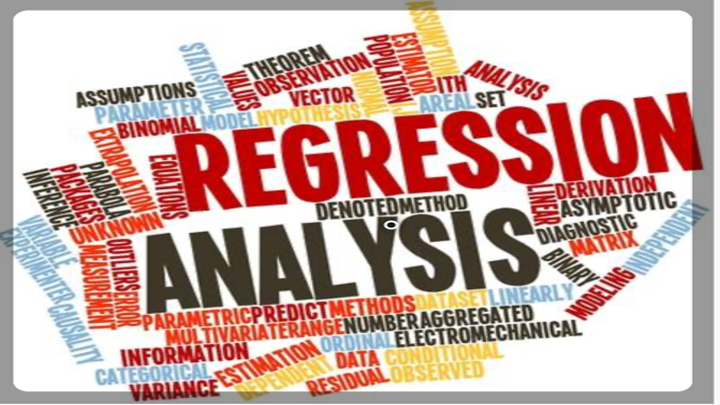

In [45]:
from IPython.display import Image
Image('Regression Graphic.png')

# Applying the CreditOne Data to a Regression Problem

In [27]:
#Establishing variables for the models
model_SVR = SVR()
model_RF = RandomForestRegressor()
model_LR = LinearRegression()

#Establishing a variable for the standard scaler
sc = StandardScaler()

In [11]:
#Training the models
model_SVR.fit(X_train, y_train)
model_RF.fit(X_train, y_train)
model_LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
print(cross_val_score(model_RF, X_train, y_train, cv = 5))

[0.19651492 0.20888678 0.15883635 0.18861256 0.17541823]


In [13]:
print(cross_val_score(model_SVR, X_train, y_train, cv = 5))

[-0.07924719 -0.08332471 -0.07745897 -0.10101741 -0.08346472]


In [14]:
print(cross_val_score(model_LR, X_train, y_train, cv = 5))

[0.11859943 0.1240043  0.11064754 0.12011302 0.12220941]


In [15]:
model_RF.score(X_train, y_train)

0.885905431494709

In [16]:
model_SVR.score(X_train, y_train)

-0.07715313052679675

In [17]:
model_LR.score(X_train, y_train)

0.12204078304822785

In [18]:
predictions = model_RF.predict(X_test)

In [19]:
rmse = sqrt(mean_squared_error(y_test, predictions))

In [20]:
predRsquared = r2_score(y_test,predictions)

In [21]:
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.193
RMSE: 0.373


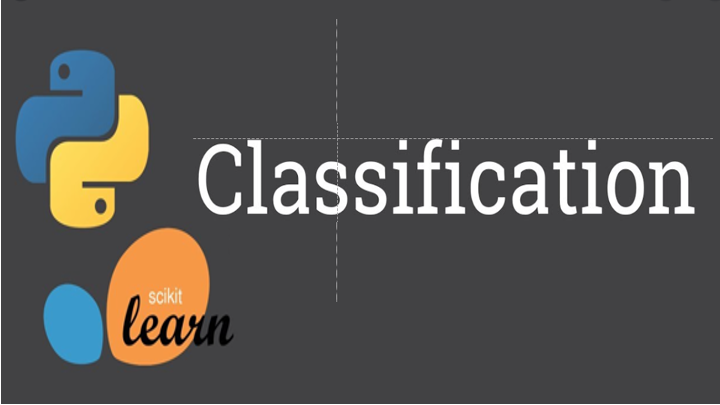

In [50]:
from IPython.display import Image
Image('Classification Graphic 2.png')

# Applying the CreditOne Data to a Classification Problem

In [28]:
#Classification Estimators
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [29]:
#Establishing variables for the models
model_SVC = SVC()
model_DT = DecisionTreeClassifier()
model_RFC = RandomForestClassifier()

In [30]:
#Training the models
model_SVC.fit(X_train, y_train)
model_DT.fit(X_train, y_train)
model_RFC.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
model_SVC.score(X_train, y_train)

0.7793809523809524

In [32]:
model_DT.score(X_train, y_train)

1.0

In [33]:
model_RFC.score(X_train, y_train)

1.0

## Applying Recursive Feature Elimination

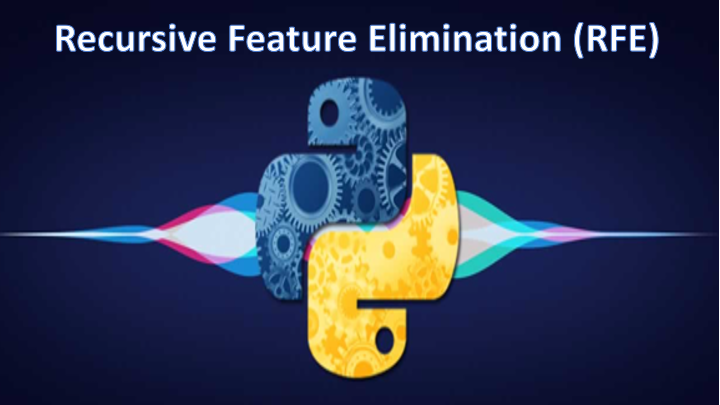

In [43]:
from IPython.display import Image
Image('RFE Graphic.png')

In [34]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=15)

In [35]:
rfe.fit(X, y)
rfe.ranking_

array([ 1,  1, 10,  4,  7,  1,  1,  3,  5,  9,  8,  6,  1,  1,  1,  2,  1,
        1,  1,  1,  1,  1,  1,  1])

In [36]:
names = X[0:24]
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))

[(1, 'AGE'), (1, 'BILL_AMT1'), (1, 'BILL_AMT2'), (1, 'BILL_AMT3'), (1, 'BILL_AMT5'), (1, 'BILL_AMT6'), (1, 'ID'), (1, 'LIMIT_BAL'), (1, 'PAY_0'), (1, 'PAY_AMT1'), (1, 'PAY_AMT2'), (1, 'PAY_AMT3'), (1, 'PAY_AMT4'), (1, 'PAY_AMT5'), (1, 'PAY_AMT6'), (2, 'BILL_AMT4'), (3, 'PAY_2'), (4, 'EDUCATION'), (5, 'PAY_3'), (6, 'PAY_6'), (7, 'MARRIAGE'), (8, 'PAY_5'), (9, 'PAY_4'), (10, 'SEX')]


In [37]:
Xrfe = rawData.iloc[:,[0,1,5,12,12,13,14,15,16,17,18,19,20,22,23]]

In [38]:
Xrfe.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT5,PAY_AMT6
0,1,20000,24,3913,3913,3102,689,0,0,0,0,689,0,0,0
1,2,120000,26,2682,2682,1725,2682,3272,3455,3261,0,1000,1000,0,2000
2,3,90000,34,29239,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,5000
3,4,50000,37,46990,46990,48233,49291,28314,28959,29547,2000,2019,1200,1069,1000
4,5,50000,57,8617,8617,5670,35835,20940,19146,19131,2000,36681,10000,689,679


In [39]:
#Creating the training and testing sets
Xrfe_train,Xrfe_test,y_train,y_test = train_test_split(Xrfe,y,train_size = 0.70, test_size = 0.30, random_state = 15)

In [40]:
Xrfe_train.shape, Xrfe_test.shape

((21000, 15), (9000, 15))

In [41]:
y_train.shape, y_test.shape

((21000,), (9000,))

In [42]:
#Establishing variables for the models
modelRFE_SVC = SVC()
modelRFE_DT = DecisionTreeClassifier()
modelRFE_RFC = RandomForestClassifier()

In [39]:
#Training the models
modelRFE_SVC.fit(Xrfe_train, y_train)
modelRFE_DT.fit(Xrfe_train, y_train)
modelRFE_RFC.fit(Xrfe_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
modelRFE_SVC.score(Xrfe_train, y_train)

0.7795238095238095

In [41]:
modelRFE_DT.score(Xrfe_train, y_train)

1.0

In [42]:
modelRFE_RFC.score(Xrfe_train, y_train)

1.0

## Conclusion on RFE - Marginal increase in the SVC score from 0.7793 to 0.7795

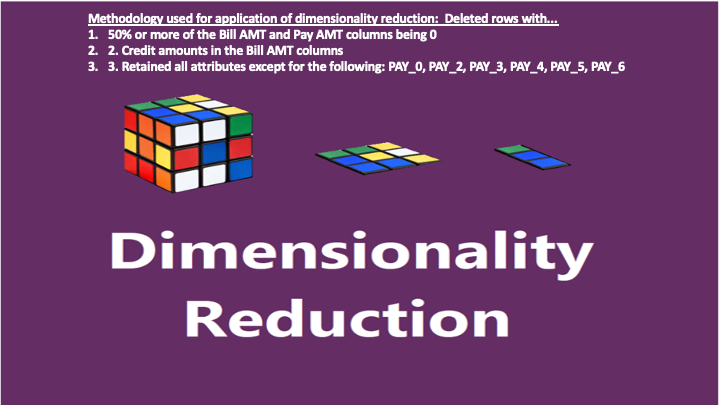

In [44]:
from IPython.display import Image
Image('DR Graphic.png')

In [51]:
rawDataDR = pd.read_csv('Binned Credit Data-rev upload4.csv', header=0)
rawDataDR.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,RISK_OF_DEFAULT
0,15606,20000,2,2,1,27,19667,15,15,41,10522,12340,0,0,26,19700,2000,2000,0
1,9543,140000,1,1,2,32,12319,0,0,61,561,528,0,0,61,500,528,498,0
2,11214,120000,1,2,2,34,67,0,0,222,836,1259,0,0,222,836,1259,2797,0
3,266,150000,2,2,1,25,6156,0,0,316,316,316,0,0,316,316,316,316,0
4,13013,120000,1,3,1,54,632,632,316,316,316,316,0,0,316,316,316,316,0


In [52]:
#Feature space
Xdr = rawDataDR.iloc[:,0:18]

In [53]:
Xdr.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,23135.000000,23135.000000,23135.000000,23135.000000,23135.000000,23135.000000,23135.000000,23135.000000,23135.000000,23135.000000,23135.000000,23135.000000,23135.000000,2.313500e+04,23135.000000,23135.000000,23135.000000,23135.000000
mean,15106.815518,166713.191269,1.604020,1.861984,1.555522,35.381759,61573.731921,59819.722585,57579.900411,53521.213573,49999.939226,48267.532094,6509.829263,6.643397e+03,6034.191701,5498.961919,5479.433499,5819.005706
std,8634.665805,130745.094101,0.489071,0.735375,0.521370,9.217604,77953.465325,75456.081162,72753.443383,68465.701436,64643.337640,63238.489592,17429.286189,2.128178e+04,18525.413632,15758.954933,15402.220507,18100.035959
min,2.000000,10000.000000,1.000000,1.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7645.500000,50000.000000,1.000000,1.000000,1.000000,28.000000,9211.000000,9425.500000,9710.500000,9536.000000,8886.000000,7658.500000,1500.000000,1.457500e+03,1034.000000,920.000000,900.000000,800.000000
50%,15223.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,34033.000000,32802.000000,30425.000000,28300.000000,26371.000000,25120.000000,2944.000000,2.700000e+03,2200.000000,2000.000000,2000.000000,2000.000000
75%,22511.500000,240000.000000,2.000000,2.000000,2.000000,41.000000,81786.500000,79553.500000,76452.500000,70739.000000,66112.500000,63417.000000,6000.000000,5.800000e+03,5013.500000,5000.000000,5000.000000,5000.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,964511.000000,983931.000000,693131.000000,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000


In [54]:
#Establishing the dependent variable
ydr = rawDataDR.iloc[:,18]

In [55]:
ydr.describe

<bound method NDFrame.describe of 0        0
1        0
2        0
3        0
4        0
        ..
23130    0
23131    0
23132    0
23133    0
23134    0
Name: RISK_OF_DEFAULT, Length: 23135, dtype: int64>

In [56]:
#Creating the training and testing sets
Xdr_train,Xdr_test,ydr_train,ydr_test = train_test_split(Xdr,ydr,train_size = 0.70, test_size = 0.30, random_state = 15)

In [57]:
Xdr_train.shape, Xdr_test.shape

((16194, 18), (6941, 18))

In [58]:
ydr_train.shape, ydr_test.shape

((16194,), (6941,))

In [59]:
#Establishing variables for the models
modelDR_SVC = SVC()
modelDR_DT = DecisionTreeClassifier()
modelDR_RFC = RandomForestClassifier()

In [24]:
#Training the models
modelDR_SVC.fit(Xdr_train, ydr_train)
modelDR_DT.fit(Xdr_train, ydr_train)
modelDR_RFC.fit(Xdr_train, ydr_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
modelDR_SVC.score(Xdr_train, ydr_train)

0.7982586143015932

In [54]:
modelDR_DT.score(Xdr_train, ydr_train)

1.0

In [55]:
modelDR_RFC.score(Xdr_train, ydr_train)

1.0

## Conclusion on Dimensionality Reduction

1.  Increased SVC score from 0.7793 to 0.7982
2.  No impact on the Decision Tree Classifier
3.  Slight decrease in the Random Forest Classifier from 1 to 0.9999

# Hypertuning Model Parameters

In [28]:
from sklearn.model_selection import GridSearchCV

## Tuning SVC Estimator

In [45]:
param_SVCgrid = {'C': [0.1, 1,10, 100], 'gamma': [0.1, 1, 10, 100]}

In [46]:
grid_SVC = GridSearchCV(estimator = modelDR_SVC, param_grid = param_SVCgrid, refit = True)

In [47]:
grid_SVC.fit(Xdr_train, ydr_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [48]:
grid_SVC.best_params_

{'C': 0.1, 'gamma': 0.1}

In [103]:
modelDR_SVC2 = SVC(C = 0.1, gamma = 0.1)

In [104]:
#Training the hypertuned SVC model
modelDR_SVC2.fit(Xdr_train, ydr_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Tuning Decision Tree Estimator

In [54]:
param_DTgrid = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 2, 3]}

In [55]:
grid_DT = GridSearchCV(estimator = modelDR_DT, param_grid = param_DTgrid)

In [56]:
grid_DT.fit(Xdr_train, ydr_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [57]:
grid_DT.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'splitter': 'random'}

In [120]:
modelDR_DTC2 = DecisionTreeClassifier(criterion = 'gini', min_samples_leaf = 2, min_samples_split = 3, splitter = 'random')

In [121]:
#Training the hypertuned Decision Tree model
modelDR_DTC2.fit(Xdr_train, ydr_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

## Tuning Random Forest Estimator

In [25]:
param_RFgrid = {'criterion': ['gini', 'entropy'], 'n_estimators': [1, 20, 50, 100, 110, 120], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 2, 3]}

In [29]:
grid_RF = GridSearchCV(estimator = modelDR_RFC, param_grid = param_RFgrid)

In [30]:
grid_RF.fit(Xdr_train, ydr_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [31]:
grid_RF.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [96]:
modelDR_RFC2 = RandomForestClassifier(criterion = 'entropy', min_samples_leaf = 3, min_samples_split = 2, n_estimators = 100)

In [122]:
#Training the hypertuned Random Forest model
modelDR_RFC2.fit(Xdr_train, ydr_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Model Metrics & Making Predictions with the Classification Models

## Support Vector Machine Classifier

In [123]:
print(cross_val_score(modelDR_SVC2, Xdr_train, ydr_train, cv = 5))

[0.79839457 0.79808583 0.79808583 0.79808583 0.7983323 ]


In [131]:
modelDR_SVC2.score(Xdr_train, ydr_train)

0.7981968630356923

In [132]:
predictionsSVC2 = modelDR_SVC2.predict(Xdr_test)

In [133]:
results = confusion_matrix(ydr_test, predictionsSVC2)
print(results)

[[5484    0]
 [1457    0]]


In [134]:
print('Accuracy Score: ', accuracy_score(ydr_test, predictionsSVC2))

Accuracy Score:  0.7900878835902607


In [136]:
print(classification_report(ydr_test, predictionsSVC2))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      5484
           1       0.00      0.00      0.00      1457

    accuracy                           0.79      6941
   macro avg       0.40      0.50      0.44      6941
weighted avg       0.62      0.79      0.70      6941



In [151]:
F1_score_SVC2 = f1_score(ydr_test, predictionsSVC2, average = 'weighted')
print(F1_score_SVC2)

0.6974393486694551


## Decision Tree Classifier

In [124]:
print(cross_val_score(modelDR_DTC2, Xdr_train, ydr_train, cv = 5))

[0.7175054  0.72861994 0.7224452  0.73664711 0.73440395]


In [126]:
modelDR_DTC2.score(Xdr_train, ydr_train)

0.9328763739656663

In [127]:
predictionsDTC2 = modelDR_DTC2.predict(Xdr_test)

In [128]:
results = confusion_matrix(ydr_test, predictionsDTC2)
print(results)

[[4622  862]
 [1100  357]]


In [129]:
print('Accuracy Score: ', accuracy_score(ydr_test, predictionsDTC2))

Accuracy Score:  0.7173317965710992


In [130]:
print(classification_report(ydr_test, predictionsDTC2))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      5484
           1       0.29      0.25      0.27      1457

    accuracy                           0.72      6941
   macro avg       0.55      0.54      0.55      6941
weighted avg       0.70      0.72      0.71      6941



In [152]:
F1_score_DTC2 = f1_score(ydr_test, predictionsDTC2, average = 'weighted')
print(F1_score_DTC2)

0.7077634648352922


## Random Forest Classifier

In [98]:
modelDR_RFC2.score(Xdr_train, ydr_train)

0.9578856366555515

In [137]:
print(cross_val_score(modelDR_RFC2, Xdr_train, ydr_train, cv = 5))

[0.80148194 0.79777709 0.80703921 0.80209941 0.80234713]


In [138]:
predictionsRFC2 = modelDR_RFC2.predict(Xdr_test)

In [139]:
results = confusion_matrix(ydr_test, predictionsRFC2)
print(results)

[[5303  181]
 [1244  213]]


In [140]:
print('Accuracy Score: ', accuracy_score(ydr_test, predictionsRFC2))

Accuracy Score:  0.794698170292465


In [141]:
print(classification_report(ydr_test, predictionsRFC2))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      5484
           1       0.54      0.15      0.23      1457

    accuracy                           0.79      6941
   macro avg       0.68      0.56      0.56      6941
weighted avg       0.75      0.79      0.74      6941



In [153]:
F1_score_RFC2 = f1_score(ydr_test, predictionsRFC2, average = 'weighted')
print(F1_score_RFC2)

0.7448171048536157
